# Useful visuals in Py

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [8]:
#Upload wine dataset
raw_data = datasets.load_wine()
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
df = features
df['target']=raw_data['target']
df['class']=df['target'].map(lambda ind: raw_data['target_names'][ind])
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0


In [12]:
#load another df 'penguins'
df_2 = sns.load_dataset('penguins')
df_2.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [13]:
#Correlation matrix, table
df_2_numeric = df_2.select_dtypes(include=[np.number])
df_2_numeric.corr().style.background_gradient(cmap='RdYlGn')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [14]:
#set theme fo all next charts:
#style: darkgrid, whitegrid, dark, white, ticks 
#color palette: deep, muted, pastel, bright, dark, colorblind
sns.set_theme(style='ticks', palette='muted')

Text(0.5, 1.0, 'Correlation Heatmap')

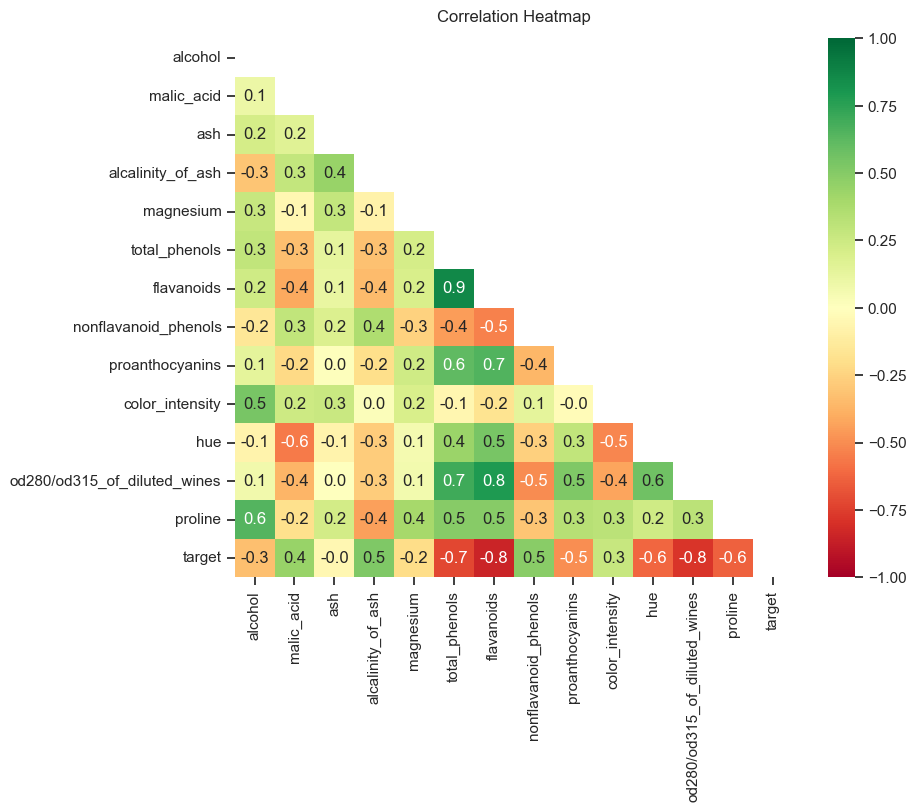

In [16]:
#Correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
#chart size
plt.figure(figsize=(9, 7))
#create mask which hide duplicate values of the correlation
mask = np.triu(np.ones_like(corr, dtype=bool))
#vmin, vmax: min|max axis, annot: numbers сaptions, cmap: color, fmt: number format, mask: hide duplicated top part 
heatmap = sns.heatmap(df_numeric.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'RdYlGn', fmt="0.1f", mask=mask)
#create title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


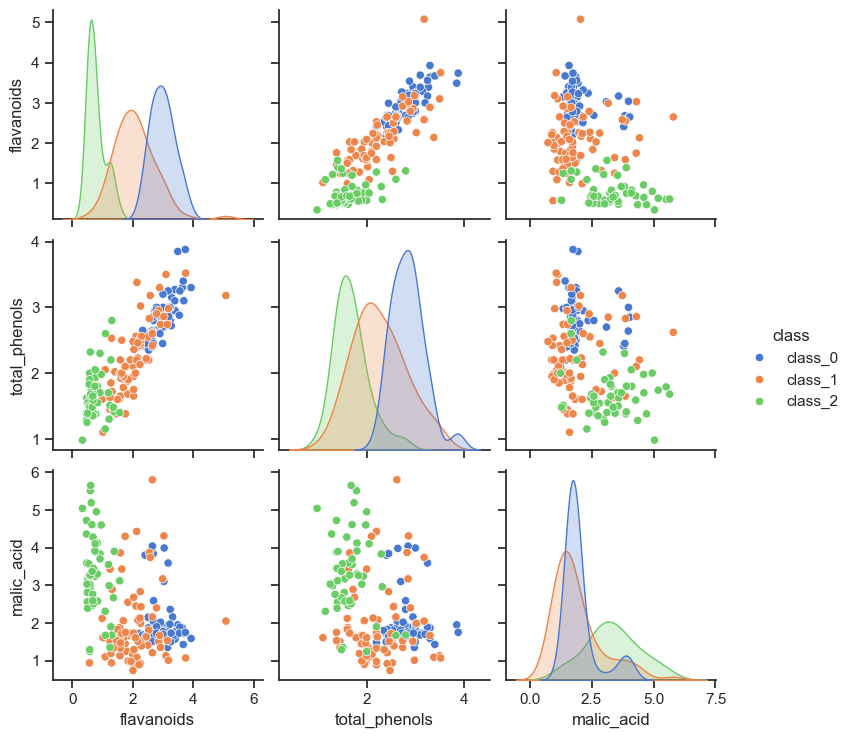

In [17]:
#pairplot
sns.pairplot(df[['class', 'flavanoids', 'total_phenols', 'malic_acid']], hue="class")

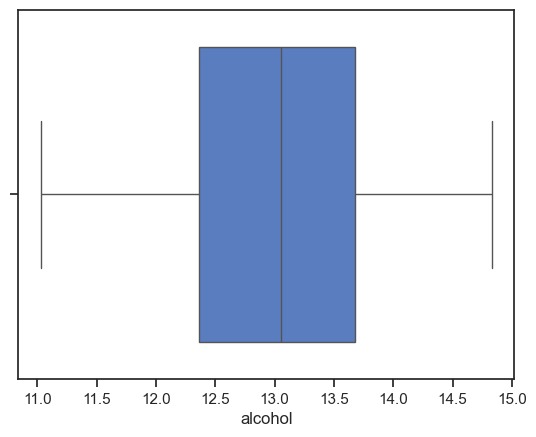

In [18]:
#boxplot
#we can change y and x axis, to show vertical|horizontal boxplot
sns.boxplot(x=df['alcohol'])
plt.show()

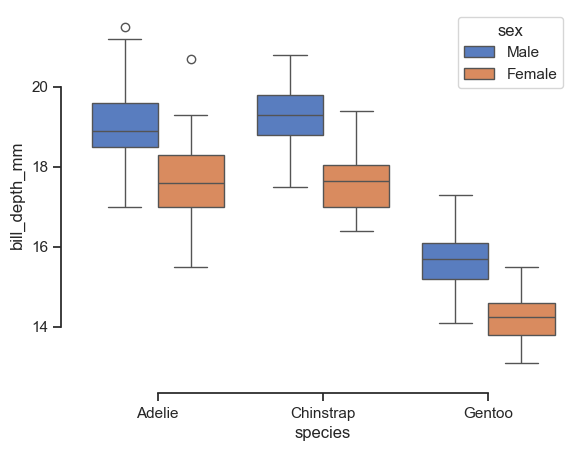

In [19]:
#Draw a nested boxplot to show bills by day and time
sns.boxplot(x="species", y="bill_depth_mm",
            hue="sex",
            data=df_2)
sns.despine(offset=10, trim=True)

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


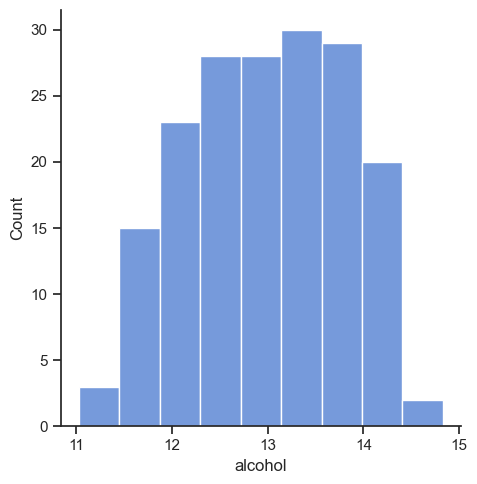

In [20]:
#Histogramm
sns_plot = sns.displot(df['alcohol'])

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


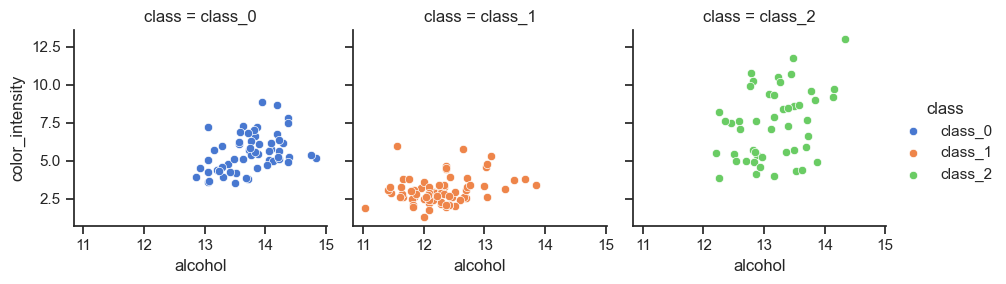

In [21]:
#Create dotplot by different groups
#col_wrap: size, width of the chart
grid = sns.FacetGrid(df, col="class", hue="class", col_wrap=3)
grid.map(sns.scatterplot, "alcohol", "color_intensity")
grid.add_legend()

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


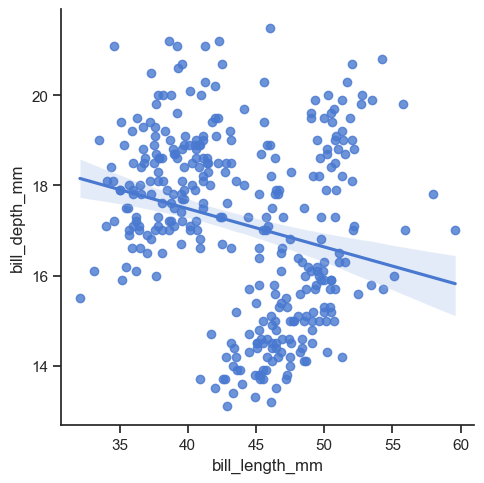

In [22]:
#Dotplot + regresiion line
sns.lmplot(data=df_2, x='bill_length_mm', y='bill_depth_mm')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

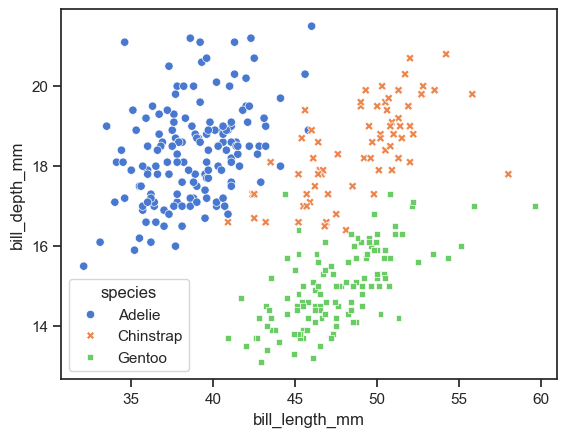

In [23]:
#Scatterplot
sns.scatterplot(data=df_2, x='bill_length_mm', y='bill_depth_mm', style='species', hue='species')

C:\Users\IgIgnatov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


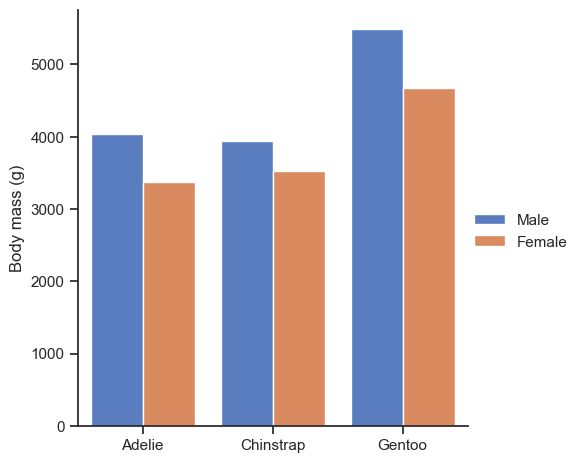

In [26]:
# Draw a nested barplot by species and sex
#errorbar = sd|None - show|hide standard deviation
# palette= "dark", alpha=.6, height=6 - to correct color style
g = sns.catplot(
    data=df_2, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar=None)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")